# Projeto de Descoberta de Fraudes no consumo de Água com Deep Learning💧

## Empresa parceira: Aegea Saneamento

- Abaixo você irá encontrar descrições sobre a problemática relacionada ao projeto e o nosso objetivo e benefícios que esperamos alcançar. 👇

#### Problemática base 🚨

A fraude no consumo de água é um grande desafio enfrentado pela empresa e qualquer empresa de prestação de serviços de saneamento. Esse problema afeta tanto o faturamento e a arrecadação da empresa, quanto a qualidade do serviço de abastecimento de água.

A fraude acontece quando um consumidor manipula o instrumento de medição de consumo de água, chamado hidrômetro, realiza ligações clandestinas ou qualquer forma de adulteração que reduza ou até mesmo elimine os valores cobrados pelo consumo real.

As práticas acima descritas, além de causarem perdas econômicas para Aegea, também geram impactos na qualidade do abastecimento de água à população, comprometendo a eficiência e a integridade física da infraestrutura de distribuição de água.

#### Impactos 📊

- Danos a tubulações resultando em vazamentos, resultando em perda de água e alteração na pressão da rede de distribuição de água.
- Intermitência no abastecimento de água à população.
- Redução de valores faturados e, consequentemente, diminuição de receita.
- Aumento do risco de contaminação da água, uma vez que métodos fraudulentos não seguem padrões de segurança, possibilitando a presença de contaminantes nas redes de abastecimento.

#### Mediação 🔍

Para combater esse problema, atualmente existem diversas estratégias aplicadas na empresa, desde verificar alterações no padrão de consumo dos clientes até apontamentos de agentes de campo. Em todos os casos existem equipes especializadas em fiscalizar e sanar quaisquer fraudes que sejam detectadas. A atuação dessas equipes é delimitada diariamente por uma lista de alvos para fiscalização.

Diante do cenário acima descrito, deseja-se o desenvolvimento de uma aplicação que melhore a assertividade da atuação da Aegea na detecção de fraudes em seu âmbito de atuação, construindo um modelo de Machine Learning que demonstre eficácia nos processos de negócio.

### Objetivo e Benefícios esperados ✅

- Determinar a probabilidade de um comportamento do consumo ser fraudulento ou não, considerando, de maneira holística, dados históricos de consumo e, caso necessário, a influência de variáveis exógenas, como índices macroeconômicos, climáticos, geográficos, dentre outros.

- Melhorar a capacidade de detecção e predição de fraudes de consumo de água dos consumidores nas áreas de atuação da Aegea. Compreender melhor elementos importantes para detecção e predição de fraudes nos clientes da Aegea

## **Integrantes do Grupo** 🚀
- Camila Anacleto
- Henri Harari
- Patrick Victorino
- Pedro Rezende
- Sophia Dias
- Vitória Rodrigues

---
# Sobre o notebook 🥸

## Objetivo: Rede Neural 🎯

O objetivo principal do desenvolvimento deste notebook é realizar a construção da rede neural, abrangendo um período de 12 meses, como forma de identificar fraudes no consumo de água.

O dataset utilizado foi fornecido pela Aegea Saneamento e foi passado pela nossa pipeline de tratamento de dados, como forma de inputar de uma forma mais fácil ao modelo de rede neural.

# Implementando cuDF

- Aqui fazemos uma verificação para entender se uma GPU está sendo utilizada ou não.
- Para o projeto como um todo, desenvolvemos no Colab Pro, usando o tempo de execução em T4 GPU.

- O principal motivo de estarmos utilizando a GPU é para acelerar o processamento dos dados, visto que o cuDF é uma biblioteca que permite a manipulação de dados em GPU, o que torna o processamento mais rápido.
- Um exemplo claro disso é percebido no momento de aplicação da pipeline de tratamento dos dados, que é um processo que demanda um tempo considerável de execução. Porém, esse processo é fácilmente completado em menos de 1 minuto.

In [1]:
!nvidia-smi

Tue Sep 17 13:00:56 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   51C    P8              12W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [2]:
%load_ext cudf.pandas

# Importações dos dados e instalações de bibliotecas

In [3]:
# %pip install -q -r requirements.txt
!pip install imblearn scikeras

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.3/13.3 MB 101.0 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.3.2
    Uninstalling scikit-learn-1.3.2:
      Successfully uninstalled scikit-learn-1.3.2


In [4]:
import pandas as pd
import numpy as np
import os
import re
from datetime import datetime
import gdown
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots

import tensorflow as tf
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense, Flatten, Input, Dropout, BatchNormalization
from tensorflow.keras.metrics import BinaryAccuracy, AUC, Precision, Recall, Accuracy, TruePositives, TrueNegatives, FalsePositives, FalseNegatives
from tensorflow.keras.losses import BinaryCrossentropy
from tensorflow.keras.optimizers import Adam, Lion
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import backend as K
tf.random.set_seed(42)

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, RobustScaler, LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, precision_score, confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.decomposition import PCA
from scikeras.wrappers import KerasClassifier, KerasRegressor
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, roc_auc_score, make_scorer, accuracy_score

### Baixando dados

In [5]:
!gdown 1-2KCZB0hb4NUlj0Ofa7rrQzB2HSKQW9n

Downloading...
From: https://drive.google.com/uc?id=1-2KCZB0hb4NUlj0Ofa7rrQzB2HSKQW9n
To: /content/df_pipe.parquet
100% 51.1M/51.1M [00:00<00:00, 106MB/s]


In [6]:
df_pipe = pd.read_parquet('/content/df_pipe.parquet')
df_pipe.head()

,REFERENCIA,MATRICULA,SEQ_RESPONSAVEL,ECO_RESIDENCIAL,ECO_COMERCIAL,ECO_INDUSTRIAL,ECO_PUBLICA,DIAS_LEITURA,CONS_MEDIDO,DSC_SIMULTANEA_00NAOENTREGUE,...,TIPO_LIGACAO_CONSUMOFIXO,TIPO_LIGACAO_HIDROMETRADO,CATEGORIA_COMERCIAL,CATEGORIA_INDUSTRIAL,CATEGORIA_PUBLICA,CATEGORIA_RESIDENCIAL,Consumo_Alto,Consumo_Medio,Consumo_Baixo,fraude
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
2061787,2024-02-01,17227749,125613,1.0,0.0,0.0,0.0,31.0,0.307692,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0
7921,2024-06-01,17130325,112038,2.0,0.0,0.0,0.0,0.0,-0.615385,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0
1666916,2024-06-01,17369829,1311358,1.0,0.0,0.0,0.0,29.0,-0.307692,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0
1389361,2024-06-01,17991764,1286410,1.0,0.0,0.0,0.0,31.0,0.000000,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0
896497,2024-07-01,17927818,820533,1.0,0.0,0.0,0.0,30.0,-0.076923,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0


# Separação treino e teste

In [7]:
df_pipe.head()

,REFERENCIA,MATRICULA,SEQ_RESPONSAVEL,ECO_RESIDENCIAL,ECO_COMERCIAL,ECO_INDUSTRIAL,ECO_PUBLICA,DIAS_LEITURA,CONS_MEDIDO,DSC_SIMULTANEA_00NAOENTREGUE,...,TIPO_LIGACAO_CONSUMOFIXO,TIPO_LIGACAO_HIDROMETRADO,CATEGORIA_COMERCIAL,CATEGORIA_INDUSTRIAL,CATEGORIA_PUBLICA,CATEGORIA_RESIDENCIAL,Consumo_Alto,Consumo_Medio,Consumo_Baixo,fraude
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
2061787,2024-02-01,17227749,125613,1.0,0.0,0.0,0.0,31.0,0.307692,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0
7921,2024-06-01,17130325,112038,2.0,0.0,0.0,0.0,0.0,-0.615385,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0
1666916,2024-06-01,17369829,1311358,1.0,0.0,0.0,0.0,29.0,-0.307692,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0
1389361,2024-06-01,17991764,1286410,1.0,0.0,0.0,0.0,31.0,0.000000,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0
896497,2024-07-01,17927818,820533,1.0,0.0,0.0,0.0,30.0,-0.076923,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0


In [17]:
df_pipe.info()

<class 'cudf.core.dataframe.DataFrame'>
Index: 2780756 entries, 2061787 to 2805907
Data columns (total 47 columns):
 #   Column                                    Dtype
---  ------                                    -----
 0   REFERENCIA                                datetime64[ns]
 1   MATRICULA                                 int64
 2   SEQ_RESPONSAVEL                           int64
 3   ECO_RESIDENCIAL                           float32
 4   ECO_COMERCIAL                             float32
 5   ECO_INDUSTRIAL                            float32
 6   ECO_PUBLICA                               float32
 7   DIAS_LEITURA                              float32
 8   CONS_MEDIDO                               float32
 9   DSC_SIMULTANEA_00NAOENTREGUE              float32
 10  DSC_SIMULTANEA_01EMMAOS                   float32
 11  DSC_SIMULTANEA_02CAIXACORREIO             float32
 12  DSC_SIMULTANEA_03VIZINHO                  float32
 13  DSC_SIMULTANEA_04FIXADAAOPORTAO           float32
 14  

In [18]:
df_pipe = df_pipe.loc[:, ~df_pipe.columns.str.startswith('DSC_SIMULTANEA')]
df_pipe.info()

<class 'cudf.core.dataframe.DataFrame'>
Index: 2780756 entries, 2061787 to 2805907
Data columns (total 21 columns):
 #   Column                       Dtype
---  ------                       -----
 0   REFERENCIA                   datetime64[ns]
 1   MATRICULA                    int64
 2   SEQ_RESPONSAVEL              int64
 3   ECO_RESIDENCIAL              float32
 4   ECO_COMERCIAL                float32
 5   ECO_INDUSTRIAL               float32
 6   ECO_PUBLICA                  float32
 7   DIAS_LEITURA                 float32
 8   CONS_MEDIDO                  float32
 9   DSC_OCORRENCIA_ANORMALIDADE  float32
 10  DSC_OCORRENCIA_NORMAL        float32
 11  TIPO_LIGACAO_CONSUMOFIXO     float32
 12  TIPO_LIGACAO_HIDROMETRADO    float32
 13  CATEGORIA_COMERCIAL          float32
 14  CATEGORIA_INDUSTRIAL         float32
 15  CATEGORIA_PUBLICA            float32
 16  CATEGORIA_RESIDENCIAL        float32
 17  Consumo_Alto                 float32
 18  Consumo_Medio                float32
 19

In [19]:
# Separando as features e o alvo
take_off_columns = ['fraude', 'REFERENCIA', 'MATRICULA', 'SEQ_RESPONSAVEL']
X = df_pipe.drop(take_off_columns, axis=1)
y = df_pipe['fraude']

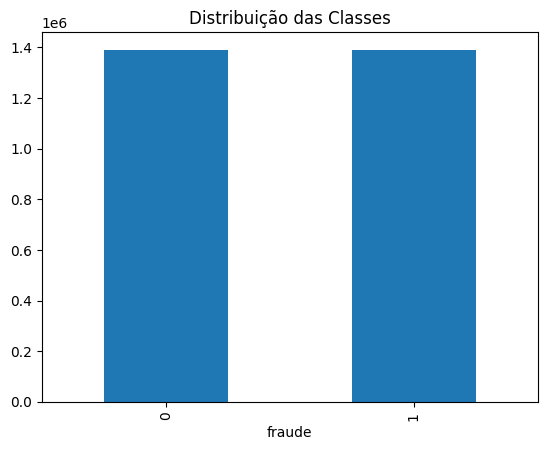

In [20]:
# Analisando o desequilíbrio das classes
y.value_counts().plot(kind='bar')
plt.title('Distribuição das Classes')
plt.show()

In [26]:
# Dividindo em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,  random_state=42)

# Compilação do modelo e estruturação da rede

In [46]:
def create_model():
  # Define a arquitetura do modelo (arquitetura em pirâmide)
  return Sequential([
    Input(shape=(X_train.shape[1],)),
    Dense(64, activation='relu'),
    BatchNormalization(),
    Dropout(0.4),
    Dense(32, activation='relu'),
    BatchNormalization(),
    Dropout(0.4),
    Dense(16, activation='relu'),
    BatchNormalization(),
    Dropout(0.4),
    Dense(1, activation='sigmoid')
  ])

In [47]:
model = create_model()

precision = tf.keras.metrics.Precision()
recall = tf.keras.metrics.Recall()

# Compilando o modelo
model.compile(
      optimizer= Adam(learning_rate=0.001),
      loss='binary_crossentropy',
      metrics=['accuracy', precision, recall])

model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_19 (Dense)                     │ (None, 64)                  │           1,152 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 64)                  │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_20 (Dense)                     │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_4                │ (None, 32)                  │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_21 (Dense)                     │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_5                │ (None, 16)                  │              64 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 16)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_22 (Dense)                     │ (None, 1)                   │              17 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,225 (16.50 KB)

 Trainable params: 4,001 (15.63 KB)

 Non-trainable params: 224 (896.00 B)

In [48]:
# Definindo o early stopping
earlyStop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True) # aqui demonstra a utilização do early stopping, tomar cuidado pra quando iremos parar

# Aplicação do dataset na rede e Treinamento

- testar rodar o modelo, tirando o earlystopping

In [38]:
# Treinando o modelo
history = model.fit(X_train,
                    y_train,
                    epochs=10,
                    batch_size=128,
                    verbose=1,
                    callbacks=[earlyStop],
                    validation_data=(X_test, y_test))

Epoch 1/10
15208/15208 ━━━━━━━━━━━━━━━━━━━━ 62s 4ms/step - accuracy: 0.5295 - loss: 0.7042 - precision_4: 0.5500 - recall_4: 0.3534 - val_accuracy: 0.5392 - val_loss: 0.6864 - val_precision_4: 0.6029 - val_recall_4: 0.2305
Epoch 2/10
15208/15208 ━━━━━━━━━━━━━━━━━━━━ 72s 3ms/step - accuracy: 0.5386 - loss: 0.6867 - precision_4: 0.5863 - recall_4: 0.2649 - val_accuracy: 0.5389 - val_loss: 0.6871 - val_precision_4: 0.6159 - val_recall_4: 0.2075
Epoch 3/10
15208/15208 ━━━━━━━━━━━━━━━━━━━━ 79s 3ms/step - accuracy: 0.5393 - loss: 0.6865 - precision_4: 0.5868 - recall_4: 0.2679 - val_accuracy: 0.5389 - val_loss: 0.6865 - val_precision_4: 0.6190 - val_recall_4: 0.2033
Epoch 4/10
15208/15208 ━━━━━━━━━━━━━━━━━━━━ 83s 3ms/step - accuracy: 0.5395 - loss: 0.6864 - precision_4: 0.5885 - recall_4: 0.2655 - val_accuracy: 0.5412 - val_loss: 0.6865 - val_precision_4: 0.6008 - val_recall_4: 0.2464
Epoch 5/10
15208/15208 ━━━━━━━━━━━━━━━━━━━━ 56s 4ms/step - accuracy: 0.5399 - loss: 0.6863 - precision_4: 0.

In [39]:
# Avaliar o modelo no conjunto de teste
results = model.evaluate(X_test, y_test)
loss = results[0]
accuracy = results[1]
precision = results[2]

print(f'Loss: {loss}, Accuracy: {accuracy}, Precision: {precision}')

26070/26070 ━━━━━━━━━━━━━━━━━━━━ 71s 3ms/step - accuracy: 0.5399 - loss: 0.6863 - precision_4: 0.6069 - recall_4: 0.2290
Loss: 0.6862391829490662, Accuracy: 0.5406489968299866, Precision: 0.6082948446273804


## Previsão de novos casos

In [ ]:
# # Nova entrada de dados (por exemplo, um novo cliente com consumo nos três meses)
# nova_entrada = np.array([[55, 56, 5, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]])  # Exemplo de entrada (fraude esperada) com todas as 17 features

# # Normalizando a nova entrada com base nos dados de treinamento
# nova_entrada = nova_entrada / X.max(axis=0).values # Normaliza usando todas as colunas de X

# # Fazendo a previsão com o modelo treinado
# previsao = model.predict(nova_entrada)

# # Convertendo a previsão para 'normal' ou 'fraude' com base em um limiar (0.5 é padrão para classificação binária)
# resultado = 'fraude' if previsao >= 0.5 else 'normal'

# print(f"Previsão para a nova entrada: {resultado} (probabilidade de fraude: {previsao[0][0]:.2f})")

## Analise de resultados

In [49]:
# Preparando os dados para o plot
epochs = list(range(1, len(history.history['loss']) + 1))
history_df = pd.DataFrame({
    'Epoch': epochs,
    'Training Loss': history.history['loss'],
    'Validation Loss': history.history['val_loss'],
    'Training Accuracy': history.history['accuracy'],
    'Validation Accuracy': history.history['val_accuracy'],
    'Training Precision': history.history['precision_4'],
    'Validation Precision': history.history['val_precision_4']
})

# Plotando a perda durante o treinamento
fig_loss = px.line(history_df, x='Epoch', y=['Training Loss', 'Validation Loss'],
                   labels={'value': 'Loss', 'variable': 'Type'},
                   title='Loss during Training')
fig_loss.show()

# Plotando a acurácia durante o treinamento
fig_accuracy = px.line(history_df, x='Epoch', y=['Training Accuracy', 'Validation Accuracy'],
                       labels={'value': 'Accuracy', 'variable': 'Type'},
                       title='Accuracy during Training')

# Plotando a precisão durante o treinamento
fig_accuracy = px.line(history_df, x='Epoch', y=['Training Precision', 'Validation Precision'],
                       labels={'value': 'Precision', 'variable': 'Type'},
                       title='Precision during Training')

fig_accuracy.show()

In [ ]:
# # Calculando a acurácia e o F1-score
# accuracy = accuracy_score(y_test, y_pred)
# f1 = f1_score(y_test, y_pred)
# f0_5 = fbeta_score(y_test, y_pred, beta=0.5)
# f2 = fbeta_score(y_test, y_pred, beta=2)

# print(f"Acurácia no conjunto de teste: {accuracy:.2f}")
# print(f"F1-score no conjunto de teste: {f1:.2f}")
# print(f"F0.5-score no conjunto de teste: {f0_5:.2f}")
# print(f"F2-score no conjunto de teste: {f2:.2f}")

# Hiperparâmetros e otimização do modelo

In [ ]:
model = KerasClassifier(model=create_model, x_train=X_train, optimizer='adam', learn_rate=0.01)

param_dist = {
    'model__optimizer': 'adam',
    'batch_size': [64, 128],
    'epochs': [30, 45],
    'model__learn_rate': [0.01, 0.1]
}

# Define the scoring metrics
scoring = {
    'accuracy': make_scorer(accuracy_score),
    'precision': make_scorer(precision_score),
    'recall': make_scorer(recall_score)}

random_search = RandomizedSearchCV(
    estimator=model,
    param_distributions=param_dist,
    n_iter=10,
    cv=3,
    verbose=2,
    random_state=42,
    n_jobs=1,
    scoring=scoring,
    refit='accuracy'
)

random_search.fit(X_train, y_train)

TypeError: Parameter grid for parameter 'model__optimizer' needs to be a list or a numpy array, but got 'adam' (of type str) instead. Single values need to be wrapped in a list with one element.

In [ ]:
history = model.fit(X_train,
                    y_train,
                    epochs=45,
                    batch_size=128,
                    verbose=1,
                    validation_data=(X_test, y_test))

In [ ]:
loss, accuracy, f1_score, precision, recall = model.evaluate(X_test, y_test)
print(f'Loss: {loss}, Accuracy: {accuracy}, F1-Score: {f1_score}, Precision: {precision}, Recall: {recall}, AUC: {roc_auc_score(y_test, model.predict(X_test))}')

In [ ]:
# Criando um DataFrame para armazenar as métricas
results = pd.DataFrame({
    'Modelo': ['Original', 'Otimizado'],
    'Accuracy': [0.9992, accuracy],
    'Precision': [0.8823, precision]})

# Plotando os gráficos
fig = make_subplots(rows=2, cols=2, subplot_titles=('Accuracy', 'Precision', 'Recall', 'F1-Score'))

fig.add_trace(go.Bar(x=results['Modelo'], y=results['Accuracy'], name='Accuracy'), row=1, col=1)
fig.add_trace(go.Bar(x=results['Modelo'], y=results['Precision'], name='Precision'), row=1, col=2)

fig.update_layout(height=600, width=800, title_text="Comparação de Métricas entre Modelos")
fig.show()

## Analise de resultados

In [ ]:
# Preparando os dados para o plot
epochs = list(range(1, len(history.history['loss']) + 1))
history_df = pd.DataFrame({
    'Epoch': epochs,
    'Training Loss': history.history['loss'],
    'Validation Loss': history.history['val_loss'],
    'Training Accuracy': history.history['accuracy'],
    'Validation Accuracy': history.history['val_accuracy']
})

# Plotando a perda durante o treinamento
fig_loss = px.line(history_df, x='Epoch', y=['Training Loss', 'Validation Loss'],
                   labels={'value': 'Loss', 'variable': 'Type'},
                   title='Loss during Training')
fig_loss.show()

# Plotando a acurácia durante o treinamento
fig_accuracy = px.line(history_df, x='Epoch', y=['Training Accuracy', 'Validation Accuracy'],
                       labels={'value': 'Accuracy', 'variable': 'Type'},
                       title='Accuracy during Training')
fig_accuracy.show()

In [ ]:
# Calculando a acurácia e o F1-score
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
f0_5 = fbeta_score(y_test, y_pred, beta=0.5)
f2 = fbeta_score(y_test, y_pred, beta=2)

print(f"Acurácia no conjunto de teste: {accuracy:.2f}")
print(f"F1-score no conjunto de teste: {f1:.2f}")
print(f"F0.5-score no conjunto de teste: {f0_5:.2f}")
print(f"F2-score no conjunto de teste: {f2:.2f}")

## Previsão de novos casos

In [ ]:
# Nova entrada de dados (por exemplo, um novo cliente com consumo nos três meses)
nova_entrada = np.array([[55, 56, 5]])  # Exemplo de entrada (fraude esperada)

# Normalizando a nova entrada com base nos dados de treinamento
nova_entrada = nova_entrada / X.max(axis=0)

# Fazendo a previsão com o modelo treinado
previsao = model.predict(nova_entrada)

# Convertendo a previsão para 'normal' ou 'fraude' com base em um limiar (0.5 é padrão para classificação binária)
resultado = 'fraude' if previsao >= 0.5 else 'normal'

print(f"Previsão para a nova entrada: {resultado} (probabilidade de fraude: {previsao[0][0]:.2f})")

# Importando o modelo

In [ ]:
import pickel

with open('model.pkl', 'wb') as file:
    pickle.dump(model, file)